In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset with a specified encoding
df = pd.read_csv('wintersaledata.csv',encoding= 'unicode_escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
#business requirements
#1.Customer Segmentation
#2.Product Performance
#3.Gender Analysis
#4.Age Group Insights
#5.Marital Status Impact
#6.Geographic Analysis
#7.Occupation Influence
#8.Popular Product Categories
#9.Repeat Orders Analysis
#10.Revenue Trends Over Time

# Customer Segmentation

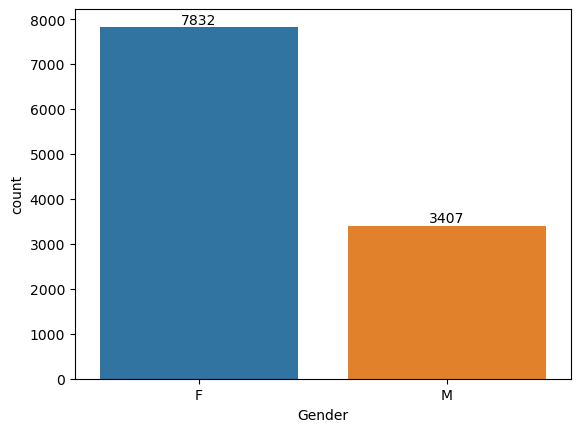

In [13]:
#Gender distribution
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

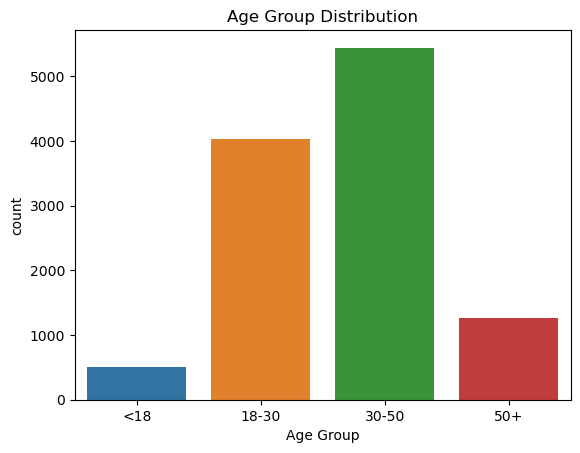

In [14]:
#Age group distribution
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '50+'])
sns.countplot(x='Age Group', data=df)
plt.title('Age Group Distribution')
plt.show()

In [15]:
#Average amount spent by each segment
segment_analysis = df.groupby('Age Group')['Amount'].mean()
print(segment_analysis)

Age Group
<18      9104.249012
18-30    9232.240387
30-50    9565.611387
50+      9818.984885
Name: Amount, dtype: float64


# Product Performance

In [16]:
#Product Performance Analysis
#Product-wise orders
product_orders = df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False)

# Display the top products by orders
print(product_orders.head())

#Product-wise total amount spent
product_amount = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)

Product_Category
Clothing & Apparel       6634
Food                     6110
Electronics & Gadgets    5226
Footwear & Shoes         2646
Household items          1331
Name: Orders, dtype: int64


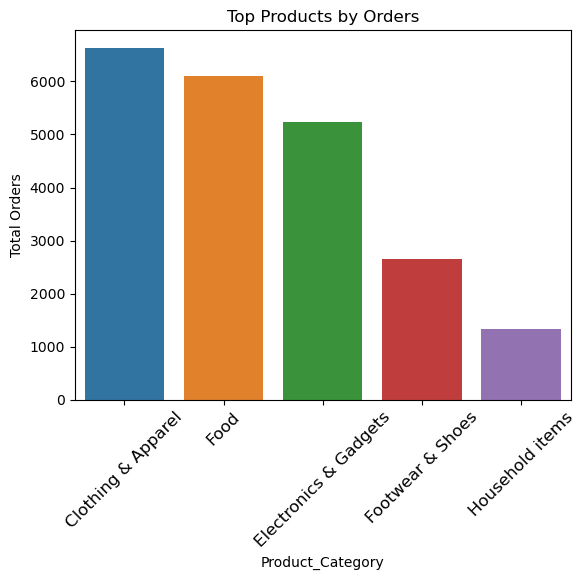

In [17]:
# Top products by orders
sns.barplot(x=product_orders.head().index, y=product_orders.head().values)
plt.title('Top Products by Orders')
plt.xlabel('Product_Category')
plt.ylabel('Total Orders')
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

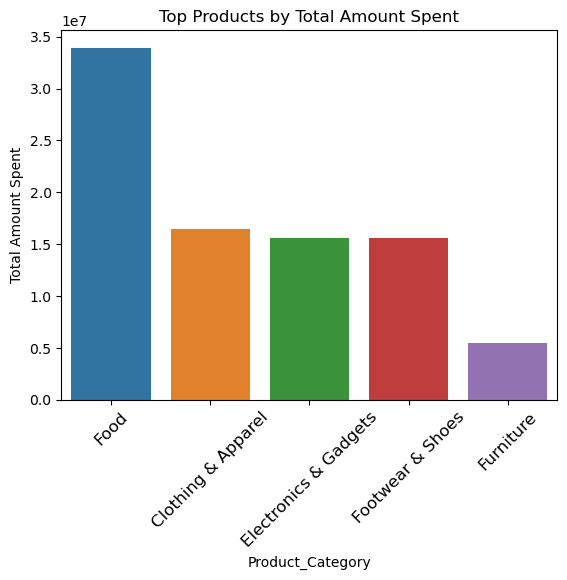

In [18]:
#Top products by total amount spent
sns.barplot(x=product_amount.head().index, y=product_amount.head().values)
plt.title('Top Products by Total Amount Spent')
plt.xlabel('Product_Category')
plt.ylabel('Total Amount Spent')
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Gender Analysis

In [19]:
#Gender-Based Product Analysis
gender_orders = df.groupby(['Gender', 'Product_Category'])['Orders'].sum()
gender_orders

Gender  Product_Category     
F       Auto                      162
        Beauty                    830
        Books                      96
        Clothing & Apparel       4648
        Decor                     192
        Electronics & Gadgets    3682
        Food                     4406
        Footwear & Shoes         1925
        Furniture                 541
        Games & Toys              673
        Hand & Power Tools         33
        Household items           736
        Office                    166
        Pet Care                  369
        Sports Products           655
        Stationery                158
        Tupperware                121
        Veterinary                155
M       Auto                       77
        Beauty                    256
        Books                     149
        Clothing & Apparel       1986
        Decor                      43
        Electronics & Gadgets    1544
        Food                     1704
        Footwear & S

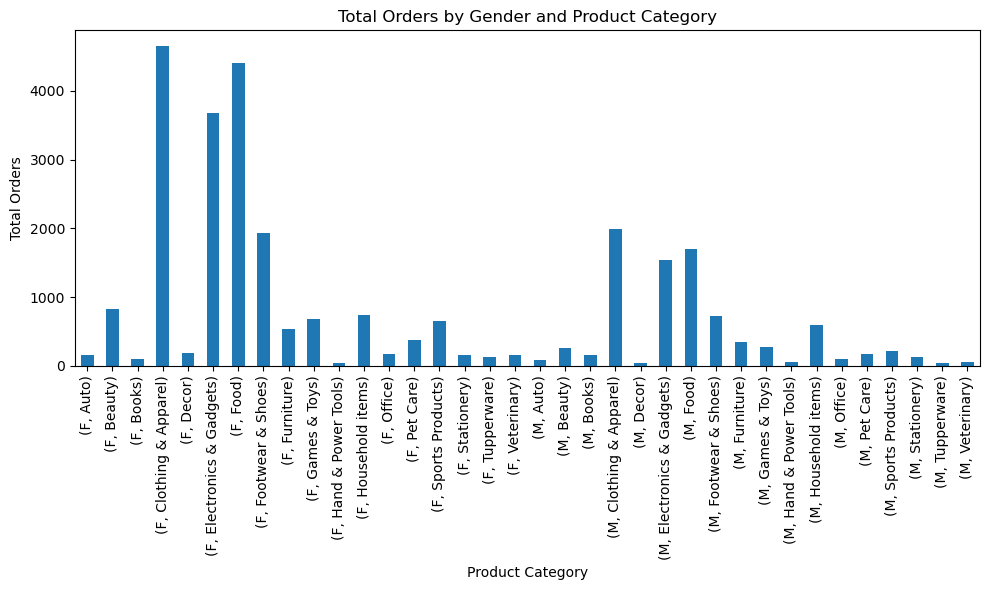

In [20]:
plt.figure(figsize=(10, 6))
gender_orders.plot(kind='bar', stacked=False)
plt.title('Total Orders by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Age Group Analysis

In [21]:
#Age group-wise total amount spent
age_group_amount = df.groupby('Age Group')['Amount'].sum()
age_group_amount

Age Group
<18       4606750
18-30    37215161
30-50    52084754
50+      12342464
Name: Amount, dtype: int32

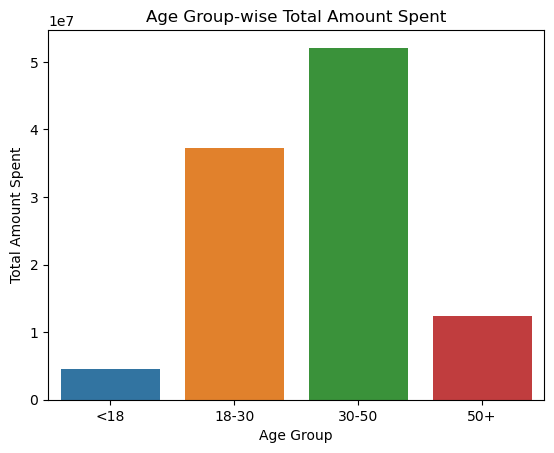

In [22]:
# Example: Bar plot for Age group-wise total amount spent
sns.barplot(x=age_group_amount.index, y=age_group_amount.values)
plt.title('Age Group-wise Total Amount Spent')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.show()

# Marital Status Impact

In [23]:
# Marital status-wise total amount spent
marital_status_amount = df.groupby('Marital_Status')['Amount'].sum()
marital_status_amount

Marital_Status
0    62125384
1    44123745
Name: Amount, dtype: int32

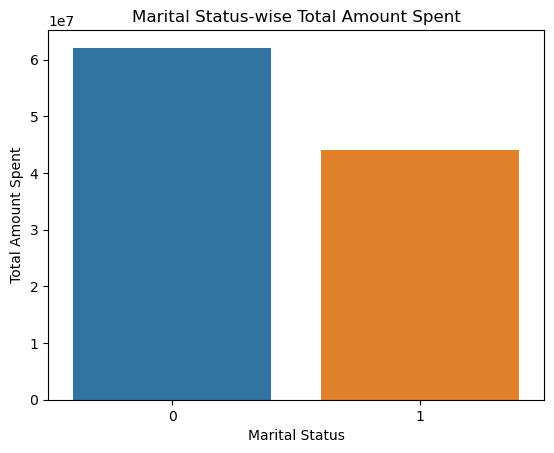

In [24]:
#Bar plot for Marital status-wise total amount spent
sns.barplot(x=marital_status_amount.index, y=marital_status_amount.values)
plt.title('Marital Status-wise Total Amount Spent')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount Spent')
plt.show()

# Geographic Analysis

In [25]:
state_amount = df.groupby('State')['Amount'].sum()
print(state_amount)

State
Andhra Pradesh       8037146
Bihar                4022757
Delhi               11603818
Gujarat              3946082
Haryana              4220175
Himachal Pradesh     4963368
Jharkhand            3026456
Karnataka           13523540
Kerala               3894491
Madhya Pradesh       8101142
Maharashtra         14427543
Punjab               1525800
Rajasthan            1909409
Telangana            1151490
Uttar Pradesh       19374968
Uttarakhand          2520944
Name: Amount, dtype: int32


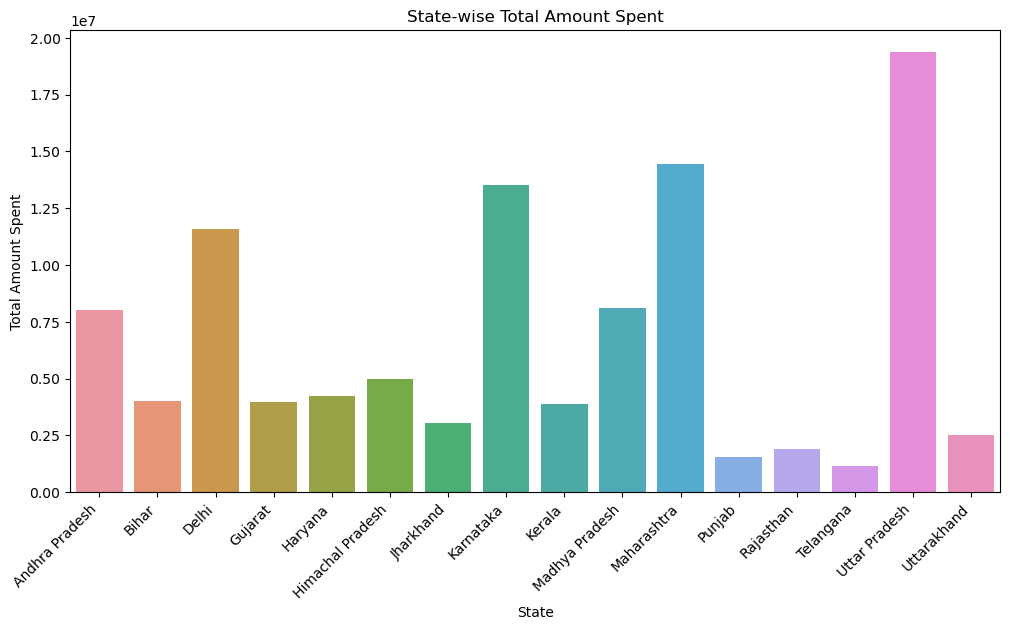

In [26]:
#Bar plot for State-wise total amount spent
plt.figure(figsize=(12, 6))
sns.barplot(x=state_amount.index, y=state_amount.values)
plt.title('State-wise Total Amount Spent')
plt.xlabel('State')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
# Zone-wise total amount spent
zone_amount = df.groupby('Zone')['Amount'].sum()
print(zone_amount)

Zone
Central     41600872
Eastern      7049213
Northern    12618752
Southern    26606667
Western     18373625
Name: Amount, dtype: int32


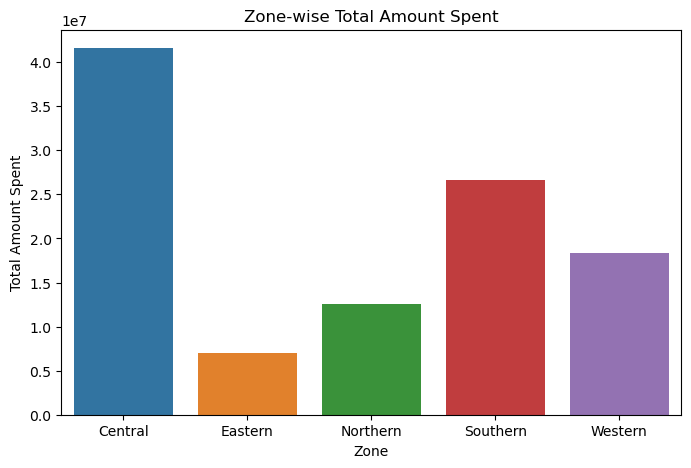

In [28]:
# Bar plot for Zone-wise total amount spent
plt.figure(figsize=(8, 5))
sns.barplot(x=zone_amount.index, y=zone_amount.values)
plt.title('Zone-wise Total Amount Spent')
plt.xlabel('Zone')
plt.ylabel('Total Amount Spent')
plt.show()

# Occupation Influence

In [29]:
# Occupation-wise total amount spent
occupation_amount = df.groupby('Occupation')['Amount'].sum()
print(occupation_amount)

Occupation
Agriculture         2593087
Automobile          5368596
Aviation           12602298
Banking            10770610
Chemical            5297436
Construction        3597511
Food Processing     4070670
Govt                8517212
Healthcare         13034586
Hospitality         6376405
IT Sector          14755079
Lawyer              4981665
Media               6295832
Retail              4783170
Textile             3204972
Name: Amount, dtype: int32


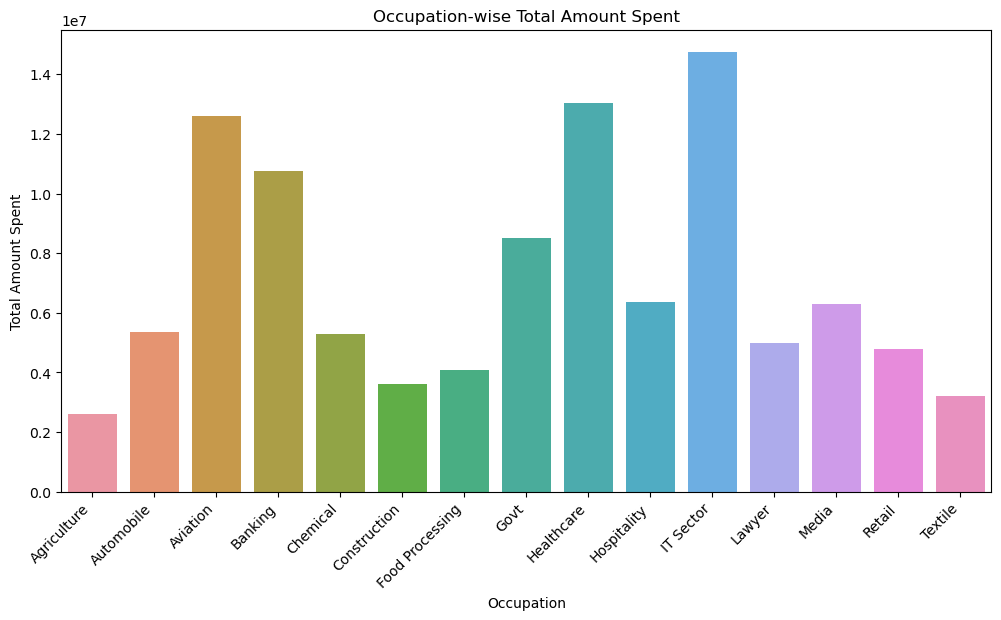

In [30]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_amount.index, y=occupation_amount.values)
plt.title('Occupation-wise Total Amount Spent')
plt.xlabel('Occupation')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.show()

# Popular Product Categories

In [31]:
#  Product category-wise total amount spent
product_category_amount = df.groupby('Product_Category')['Amount'].sum()
print(product_category_amount)

Product_Category
Auto                      1958609
Beauty                    1959484
Books                     1061478
Clothing & Apparel       16495019
Decor                      730360
Electronics & Gadgets    15643846
Food                     33933883
Footwear & Shoes         15575209
Furniture                 5440051
Games & Toys              4331694
Hand & Power Tools         405618
Household items           1569337
Office                      81936
Pet Care                   482277
Sports Products           3635933
Stationery                1676051
Tupperware                1155642
Veterinary                 112702
Name: Amount, dtype: int32


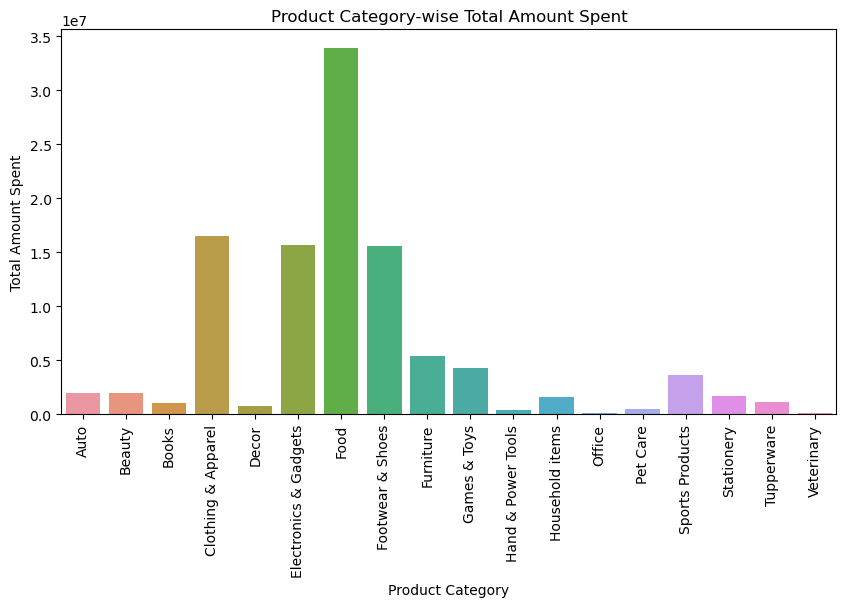

In [32]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=product_category_amount.index, y=product_category_amount.values)
plt.title('Product Category-wise Total Amount Spent')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=90,)
plt.show()

# Repeat Orders Analysis

In [33]:
# Count of repeat orders for each user
repeat_orders = df[df['Orders'] > 1].groupby('Product_Category')['Orders'].count()
print(repeat_orders)

Product_Category
Auto                       71
Beauty                    326
Books                      71
Clothing & Apparel       2006
Decor                      72
Electronics & Gadgets    1588
Food                     1845
Footwear & Shoes          796
Furniture                 263
Games & Toys              289
Hand & Power Tools         23
Household items           397
Office                     75
Pet Care                  158
Sports Products           258
Stationery                 79
Tupperware                 50
Veterinary                 64
Name: Orders, dtype: int64


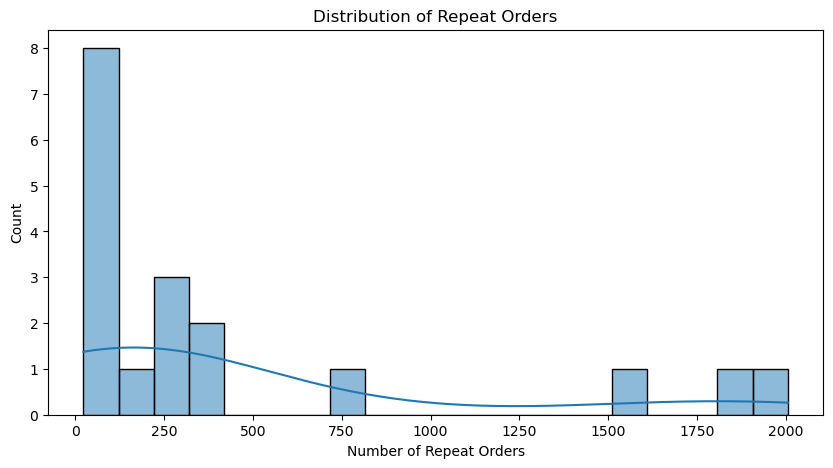

In [34]:
# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(repeat_orders, bins=20, kde=True)
plt.title('Distribution of Repeat Orders')
plt.xlabel('Number of Repeat Orders')
plt.show()

# Revenue Trends Over Time

Time
0     2800.004451
1     3129.504320
2     3048.308147
3     3100.292972
4     2899.173450
5     2969.052880
6     3179.137124
7     3175.663148
8     3747.013179
9     3178.512479
10    3173.702587
11    2722.831071
12    3078.268481
13    3622.354166
14    3043.189400
15    3198.727780
16    3654.270438
17    3660.204451
18    3132.669421
19    2831.177867
20    2585.600809
21    2857.274839
22    2948.573629
23    2974.363083
24    3278.516426
25    3224.526269
26    3493.648710
27    3134.669325
28    2830.469744
29    2524.427107
30    3024.175599
31    3001.379865
32    2827.772218
33    1099.289697
Name: Amount, dtype: float64


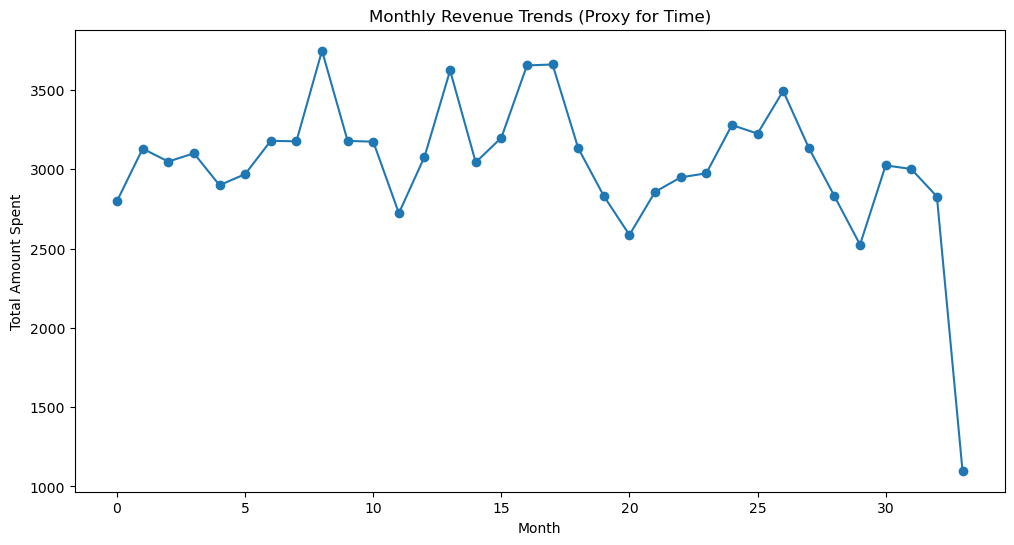

In [35]:
# Creating a synthetic dataset without a date column
np.random.seed(42)

# Replace this with the actual size of  dataset
num_records = 1000

df = pd.DataFrame({
    'User_ID': np.arange(1, num_records + 1),
    'Amount': np.random.uniform(10, 200, num_records),
})

# Assuming the data is in order, use the row index as a proxy for time
df['Time'] = df.index

# Monthly revenue trends
monthly_revenue = df.groupby(df['Time'] // 30)['Amount'].sum()

# Display monthly revenue trends
print(monthly_revenue)

# Visualization
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trends (Proxy for Time)')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.show()